# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


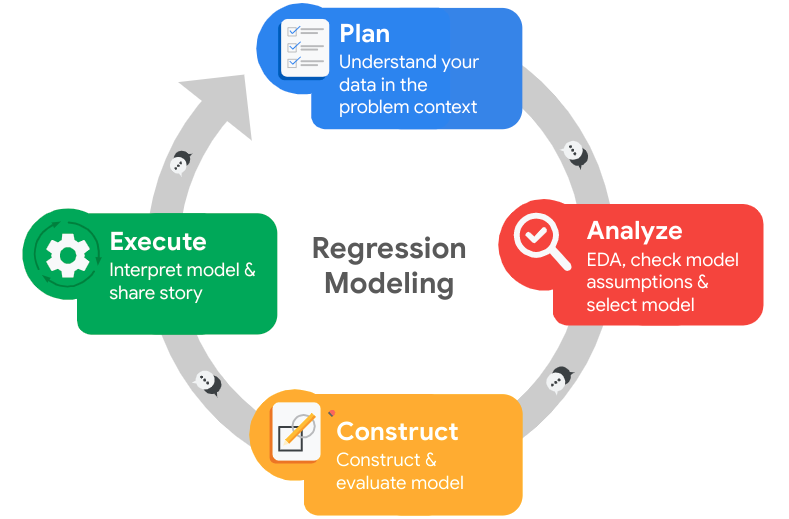

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Stake holders are the executives of the company, since they are trying to reduce costs as well as increase the chances of retaining talent in the company. 
2. The goal for this project is to create a model which will identify the variables that are most predictive of whether an employee will leave the company. This model will then be used to identify employees at risk of leaving. 
3.
4.
5. When the model makes mistakes, it is better that it predicts false positives, that is, the model predicts someone is at risk of leaving, but they are actually not, rather than false negatives(i.e. the model fails to classify an employee as at risk of leaving) since the cost of false negatives is much higher. Therefore, Recall as well as F1 should be prioritized over any other metrics

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


salary is object type instead of numerical. It can be converted to numerical. 

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


A full time is 8* 5(4) = 160 hours, for a regular 40 hours a week workweek. The mean and median in this case is the pretty close, at 200 hours a week. This means that people are probably being asked to work too many hours per month. On average, people are being asked to work 50 hours a week instead of 40. This might potentially be a reason why turnover is high. Will keep an eye on this variable as I proceed with my analysis.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###

df0 = df0.rename(columns=lambda x: x.lower().replace(' ', '_'))# Display all column names after the update
### YOUR CODE HERE ###


In [7]:
column_map = {
    'number_project': 'number_projects',
    'average_montly_hours': 'average_monthly_hours',
    'time_spend_company': 'tenure'
    
}


In [8]:
df0 = df0.rename(columns=column_map)

In [9]:
# Display all column names
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicated_rows = df0[df0.duplicated(keep='first')]

In [13]:
duplicated_rows

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop (duplicated_rows.index,axis=0 )

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df1.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

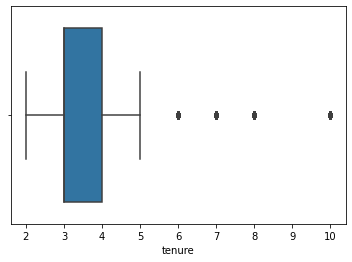

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
import seaborn as sns
sns.boxplot(x= 'tenure',data =df1)


In [17]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute the 25th percentile value in tenure 
percentile25 = df1['tenure'].quantile(0.25)
# Compute the 75th percentile value in tenure
percentile75 = df1['tenure'].quantile(0.75)
# Compute the interquartile range in tenure 
iqr = percentile75 - percentile25
# Define the upper limit and lower limit for non-outlier values in tenure 
upper_limit = percentile75 + 1.5* iqr 
lower_limit = percentile25 - 1.5* iqr
print ('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)
# Identify subset of data containing outliers in tenure 
outliers = df1[(df1['tenure']> upper_limit) | (df1['tenure'] < lower_limit)]
#Count how many rows in the data contain outliers in tenure
print ('Number of rows in data containing outliers in tenure:',len(outliers))


Lower limit: 1.5
Upper limit: 5.5
Number of rows in data containing outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

Random forest are not sensitive to outliers, since it averages out the prediction of multiple trees.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




I do not have enough information as of right now to answer the above questions. More EDA is required.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [18]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print (df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize = True))
print()

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64



In this data set, 83% of employees stayed and about 17% of employees left the company. Although there is an imbalance in the data set, it is not too dramatic( such as 90 to 10 or 95 to 5) The data can still be modeled by random forests.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

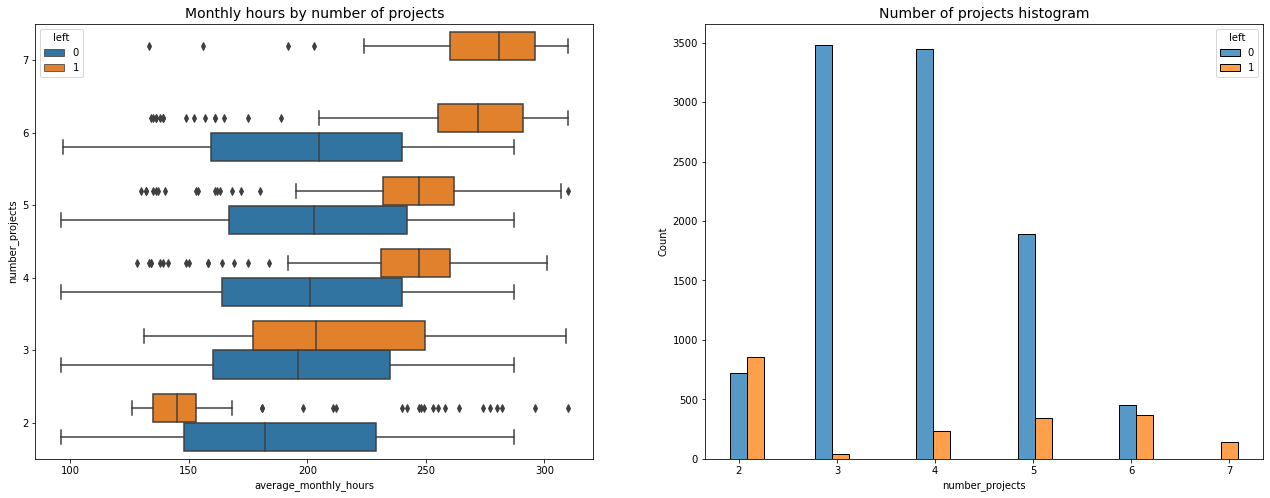

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,ax = plt.subplots(1,2,figsize=(22,8))
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left

sns.boxplot(data=df1, x='average_monthly_hours', y='number_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize = '14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_projects']
tenure_left = df1[df1['left']==1]['number_projects']
sns.histplot(data=df1, x='number_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()




It is expected that those who are assigned to more projects, logically, should also work longer hours. However, there are a number of things that standout from the monthly hours by number of projects. Among these is the fact that people who left seem to fall into two categories: 
A) Those who worked significantly less than their coworkers, as it's the case for employees with two projects, where the average hours worked is much less than that of their counterparts.
B) Those who worked considerably more than their coworkers, as it's the case for people wit 6 and more projects. All employees that had 7

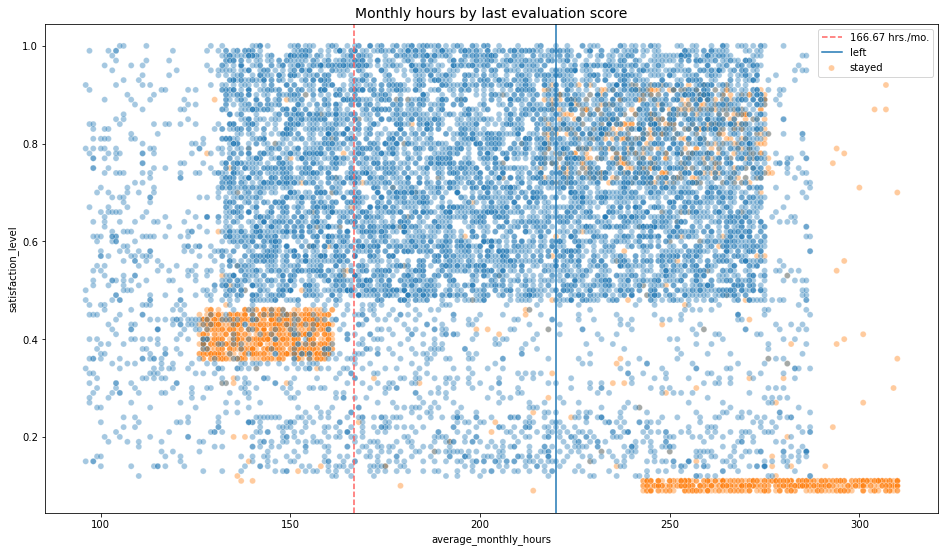

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.axvline(x=220,  label='220 hrs./mo.', ls='-')

plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The graph shows that the employees who left are located in mainly three clusters. Those who worked between ~125 - 165 hours per week, which is below the normal range of someone who works a full time job with 2 weeks of vacation per year. This cluster also had a satisfaction ranging between 0.3 to 0.5, quite a low number
The second cluster for those who left starts at about 230 hours to 250. 

The third cluster can be considered to start from 250 to ~320 hours. At this point, it is clear that the vast majority of employees who worked this many hours per month left. Another indication that employees might be overworked and thus burnt out, causing them to quit. 

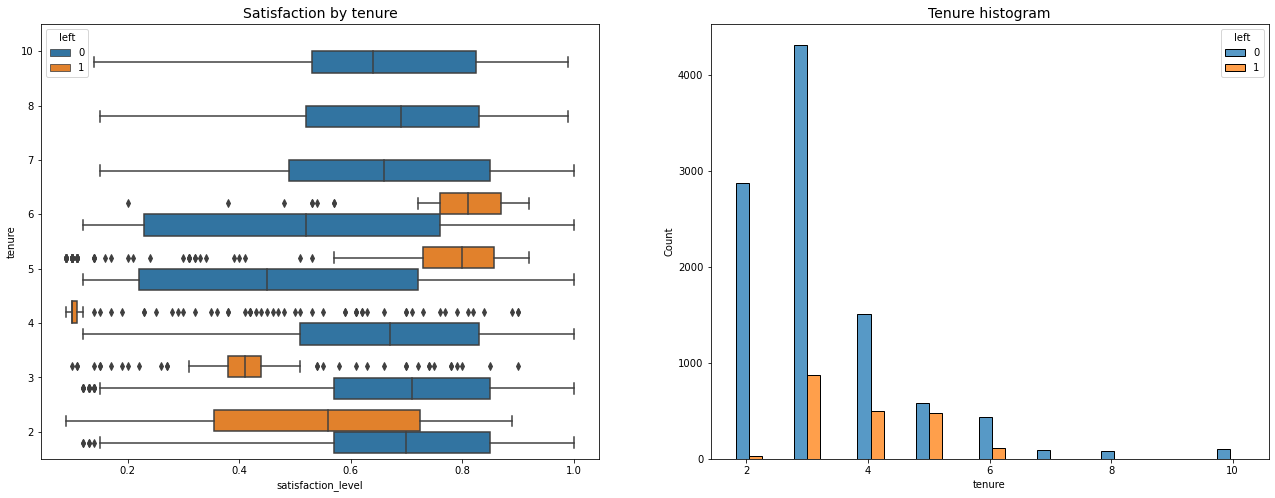

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Employees who left fell into two categories: 
A) Dissatisfied employees who had shorter tenures and very satisfied employees who had medium-length tenures 


One importan trend stands out in the satisfaction by tenure plot. In general, as tenure increases, the number of employees who leave decreases. At the same time, those who are new to the company, i.e. those who have a tenure of between 2 and 3 years have a satisfaction level similar to those who've had higher tenures of 7-10 years. 


There is an unsually low satisfaction rate for employees who left at the four-year-mark. It's worth investigating if there is a policy which kicks in at the four year mark which negatively affects employee satisfaction

At the same time, for employees who had a tenure of 2 years, we see a left-sweked distribution, which means that the majority of people had a satisfaction rate higher than 0.5 and yet a considerable amount of poeple left. This might be indicative that new employees saw their coworkers being pushed to work longer and longer hours and even though they might initially liked the job, they felt pressured to work more the longer they stayed at the company. 

In [41]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed

df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


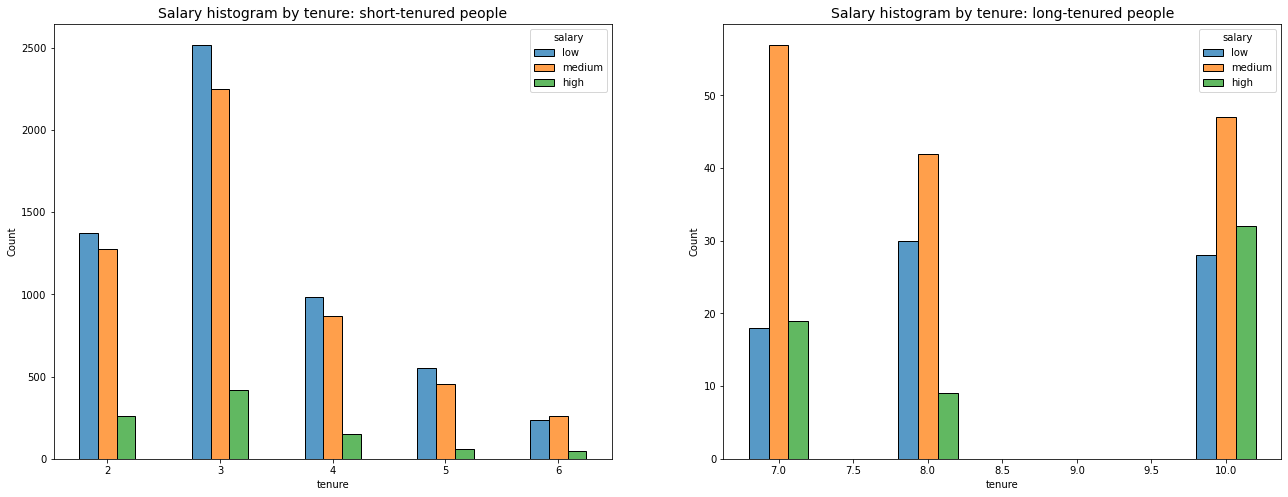

In [46]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

One thing that stands out is that at the three year mark, there seems to be the highest amount of employes with low as well as medium salaries. At the four year mark, which also coincides with the lowest satisfaction rate among employees who left the company, there is a sharp decrease for all three categories. It might be worth looking into the reasons for this. 
At the same time, long-tenured employees were not disproportionately comprised of higher-paid employees.

Text(0.5, 1.0, 'Hours by tenure')

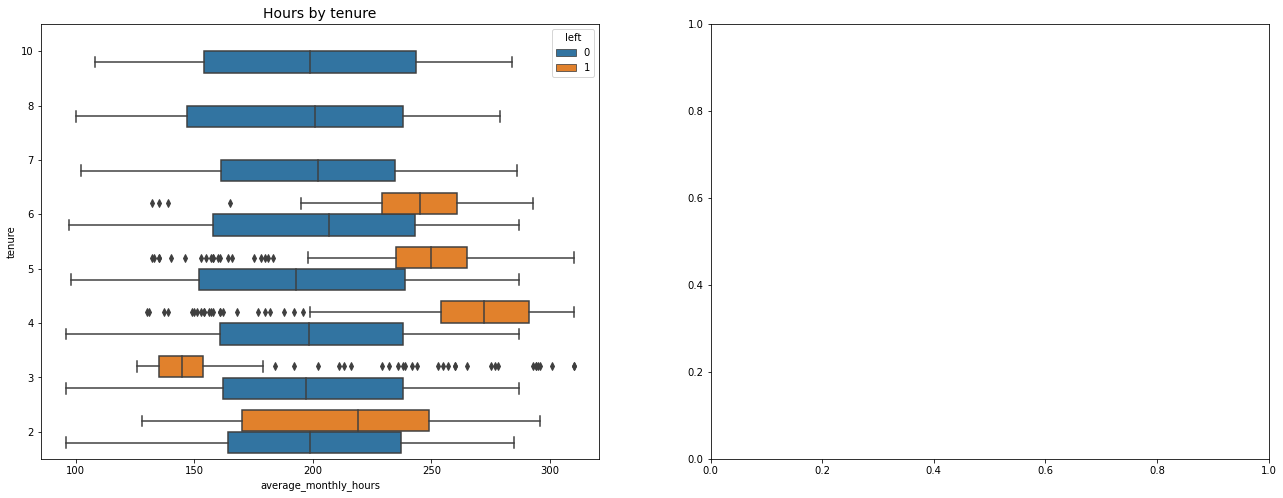

In [50]:

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Hours by tenure', fontsize='14')



In the hours by tenure boxplot, one can see that employees who leave, with the exception of those who have a tenure of 3 years, are those who work longers hours. At the four year mark, the median number of hours worked for those who left and those who stayed is quite large, about 70 hours more per month for those who left. The distrbution for those who left is also left-skewed, which means the majority of employees work longer than 275 hours per month. This could very well explain why employees who had been with the company for 4 years had the lowest satisfaction rates. 

Depending on the model we choose, we have to ensure that correlation between variables is not extreme. This can be achieved by building a heat map. 

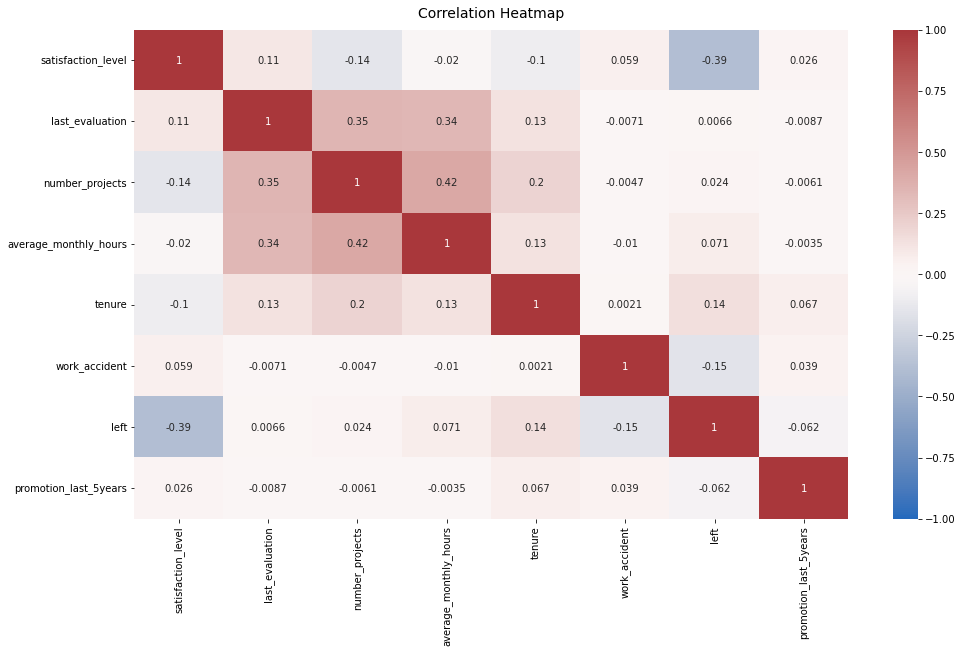

In [55]:

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

There are no variable which are significantly correlated. Therefore, models such as logistic regression can be used.

### Insights

The plots show that employees are likely being overworked. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭 
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


The independente variables chosen for this project will be all of them, since they are not heavily correlated and can contribute predictive power to our model. 

Each assumptions of the data are met, since we have already removed outliers. 



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Binary classification, since I'm trying to predict whether an employee will leave the company based on two or more independent variables. 

### Identify the types of models most appropriate for this task.

The options are: 
Logistic Regression
Naive Bayes 
Decision Trees 
Random Forest  
For this attempt, I will proceed with Logistic Regression.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [27]:
### YOUR CODE HERE ###
# First, I am gonna encode the non-numerical values, of which there are two : Department and salary 
df_enc = df1.copy()

df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
# Dummy encode the department column 
df_enc = pd.get_dummies(df_enc,drop_first=False)
df_enc.head()


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
df_enc['salary'].value_counts()

0    5740
1    5261
2     990
Name: salary, dtype: int64

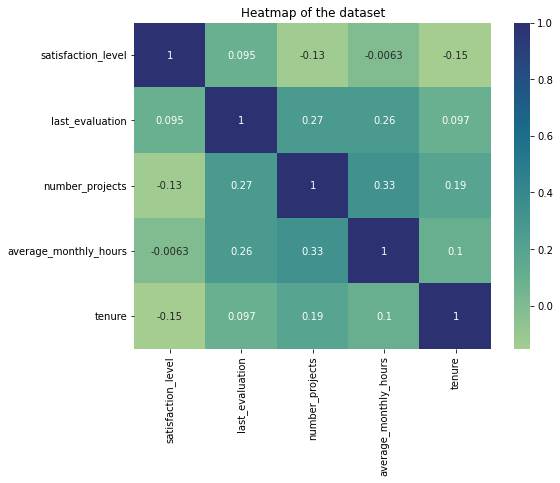

In [29]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8,6))
sns.heatmap(df_enc[['satisfaction_level','last_evaluation','number_projects','average_monthly_hours','tenure']]
           .corr(), annot= True, cmap='crest')
plt.title('Heatmap of the dataset')
plt.show()


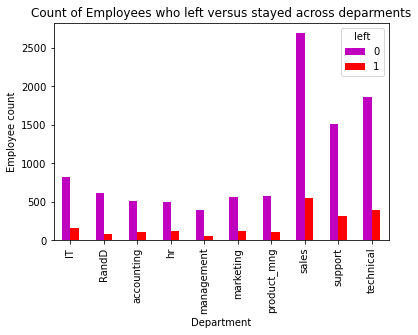

In [30]:
# Create a stacked bar plot to visualize number of employees across departments, comparing those who left to those that stayed.
pd.crosstab(df1['department'],df1['left']).plot(kind='bar',color = 'mr')
plt.title('Count of Employees who left versus stayed across deparments')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

Snce logistic regression is quite sensitive to outliers, it would be a good idea to remove outlier in the tenure column that were identified earlier. 

In [31]:
#Selec rows without outliers in 'tenure' and save resulting dataframe 
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

In [32]:
df_logreg.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# Isolate the outcome variable 
y = df_logreg['left']
# Display the first rows 
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [34]:
# Select the predictive features that you want to use in your model 
X = df_logreg.drop('left',axis = 1)
# Display the first few rows 
X.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
#Split data into training and testing 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, stratify = y, random_state =42 )



In [36]:
#Construct a logistics regression model and fit it to the training data 
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state =42, max_iter=500).fit(X_train,y_train)

In [37]:
# test log_cfl 
y_pred = log_clf.predict(X_test)

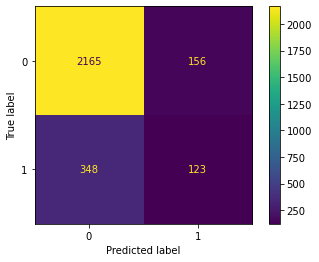

In [38]:
# Create a confusion matrix to visualize the results of the model 
log_cm = confusion_matrix(y_test,y_pred,labels = log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

plt.show()


The upper left quadrant displays the number of true negatives. The upper right quadrant displays the number of false postives, the bottom-left quadrant displays the number of false negatives, the  bottom-right quadrant displays the number of true positives. 

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

It is important to reiterate that the model should be good at predicting true negatives(or put another way, it should be good at avoiding false negatives) since the cost of a false negative is too high, that is, failing to identify an employee who is at risk of leaving the company, when they actually are at risk. This can cause the company a big amount of money, and that is the problem we are trying to solve to being with.

On the other hand, the cost of a false positive,i.e. the model predicts an employee is at risk of leaving when they actually are not, is much lower. Worse case scenario, said employee can be preemptively contacted.

In [39]:
# Check the class balance in the data. 
df_logreg['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

As already explained above, although the data set is imbalanced, it is not so extreme as a 90 to 10 or 95 to 5. If the imbalance was greater, then one might want to consider either upsampling of the minority class or downsampling of the majority class in order to achieve a more balanced data set. However, in this case, the data can be used w/o modifying the clas balance.

In [40]:
from sklearn.metrics import classification_report
target_names = ['Predicted would not leave','Predicted would leave']
print (classification_report(y_test,y_pred,target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
Logistic Regression 

The logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82% on the test set.


### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.  

Cap the number of projects that employees can work on.

Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.

Either reward employees for working longer hours, or don't require them to do so.

If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.

Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.

High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.